     gender race/ethnicity parental level of education         lunch  \
3      male        group A          associate's degree  free/reduced   
13     male        group A                some college      standard   
14   female        group A             master's degree      standard   
25     male        group A             master's degree  free/reduced   
46   female        group A          associate's degree      standard   
..      ...            ...                         ...           ...   
974  female        group A                some college      standard   
983  female        group A                some college      standard   
985    male        group A                 high school      standard   
988  female        group A            some high school  free/reduced   
994    male        group A                 high school      standard   

    test preparation course  math score  reading score  writing score  
3                      none          47             57         

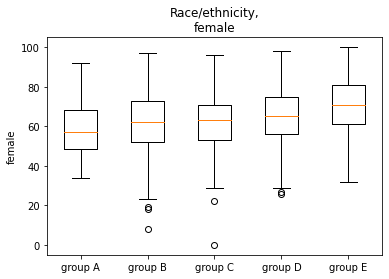

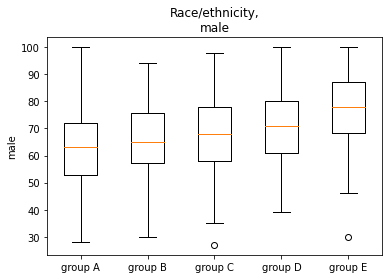

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
students = pd.read_csv('StudentsPerformance.csv')
students
race_ethnicity = ['group A', 'group B', 
                             'group C', 'group D', 'group E']
gender=["female", "male"]
a = students[students["race/ethnicity"] == "group A"] 
b = students[students["race/ethnicity"] == "group B"]
c = students[students["race/ethnicity"] == "group C"] 
d = students[students["race/ethnicity"] == "group D"]
e = students[students["race/ethnicity"] == "group E"] 

for i in range (len(gender)):
    a1 = a[a["gender"] == gender[i]]
    b1 = b[b["gender"] == gender[i]]
    c1 = c[c["gender"] == gender[i]]
    d1 = d[d["gender"] == gender[i]]
    e1 = e[e["gender"] == gender[i]]
    plt.boxplot((a1["math score"], b1["math score"], c1["math score"], d1["math score"], e1["math score"]), labels=race_ethnicity)
    plt.title('Race/ethnicity,\n'+gender[i])
    plt.ylabel(gender[i])
    plt.show()

plt.show()


/tmp/ipykernel_12890/3026262484.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['norm'] =  dfnew['Value (mAU)'] - mm
/tmp/ipykernel_12890/3026262484.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['norm'] =  dfnew['Value (mAU)'] - mm
/tmp/ipykernel_12890/3026262484.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

      Time (min)  Value (mAU)      norm
2400    4.000000    -0.395123  0.039475
2401    4.001667    -0.394583  0.040015
2402    4.003333    -0.397088  0.037510
2403    4.005000    -0.400851  0.033747
2404    4.006667    -0.403567  0.031031
...          ...          ...       ...
4196    6.993333     0.020533  0.455131
4197    6.995000     0.015021  0.449619
4198    6.996667     0.009710  0.444308
4199    6.998333     0.005610  0.440208
4200    7.000000     0.003378  0.437976

[1801 rows x 3 columns]
      Time (min)  Value (mAU)      norm
2400    4.000000    -0.267118  0.030545
2401    4.001667    -0.266089  0.031574
2402    4.003333    -0.263918  0.033745
2403    4.005000    -0.261500  0.036163
2404    4.006667    -0.259791  0.037872
...          ...          ...       ...
4196    6.993333     3.591543  3.889206
4197    6.995000     3.588327  3.885990
4198    6.996667     3.583005  3.880668
4199    6.998333     3.576311  3.873974
4200    7.000000     3.570408  3.868071

[1801 rows x 3

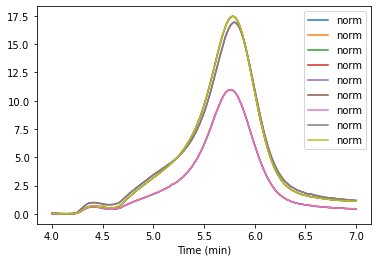

In [25]:
import pandas as pd
import os

getway = '/home-local/student/Desktop/st'
dirr = os.listdir(getway)
a = []

for file in dirr:
    way, file_type = os.path.splitext(file)
    if file_type == '.txt':
        a.append(file)
b = ['0', '1', '2', '3', '4', '5', '6']
dfdes = pd.DataFrame()
dfdes1 = pd.DataFrame()

df = pd.read_csv(a[0], sep = '\t', skiprows= 42)

del df['Step (s)']
del df['Value (mAU)']
dfnewssss = df[(df['Time (min)'] >=4) & (df['Time (min)'] <=7)]
dfdes = pd.concat([dfdes, dfnewssss], axis=1)
def f(file):
    df = pd.read_csv(file, sep = '\t', skiprows= 42)
    del df['Step (s)']
    dfnew = df[(df['Time (min)'] >=4) & (df['Time (min)'] <=7)]
    global dfdes1
    dfdes1 = pd.concat([dfdes1, dfnew['Time (min)']], axis=1)
    mm = min(dfnew['Value (mAU)'])
    dfnew['norm'] =  dfnew['Value (mAU)'] - mm
    
    global dfdes
    if 'des' in file:
        dfdes = pd.concat([dfdes, dfnew['norm']], axis=1)
    print(dfnew)        
for file in a:
    f(file)
print('wottut')
x, *y = dfdes.columns
dfdes.plot(x,y)
print(dfdes)

